Populating the interactive namespace from numpy and matplotlib


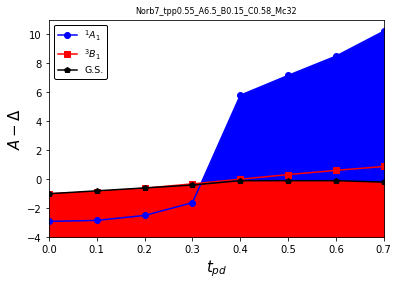

In [4]:
%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0

Norb3 = 3
Norb7 = 7
Mc3 = 1
Mc7 = 32
eta = 0.01
sym = '1A1'

titlename = sym+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)   

ff = 'Norb7_critical_Delta_1A1_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
     +'_Mc'+str(Mc7)+'_eta'+str(eta)+'.txt'
a = loadtxt('./data_phase_diagram/'+ff,skiprows=2)
plot(a[:,0], A-a[:,1], '-bo',label="$^{1}A_1$")

ff = 'Norb7_critical_Delta_3B1_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
     +'_Mc'+str(Mc7)+'_eta'+str(eta)+'.txt'
b = loadtxt('./data_phase_diagram/'+ff,skiprows=2)
plot(b[:,0], A-b[:,1], '-rs',label="$^{3}B_1$")

ff = 'Norb7_critical_Delta_GS_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
     +'_Mc'+str(Mc7)+'_eta'+str(eta)+'.txt'
c = loadtxt('./data_phase_diagram/'+ff,skiprows=3)
plot(c[:,0], A-c[:,1], '-kp', label="G.S.")

fill_between(a[:,0], A-c[:,1], A-a[:,1],color='b')
fill_between(c[:,0], -4.0, A-c[:,1],color='r')

title('Norb7_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Mc'+str(Mc7), fontsize=8)
xlabel('$t_{pd}$',fontsize=15)
ylabel('$A-\Delta$',fontsize=15)
xlim([0,0.7])
ylim([-4,11])
#text(0.45, 0.1, '(a)', fontsize=16)
#grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("phase_diagram_GS.pdf")